In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/szeged-weather/weatherHistory.csv


In [66]:
df = pd.read_csv('../input/szeged-weather/weatherHistory.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [67]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [68]:
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [69]:
df=df.dropna()
df.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [70]:
df['Precip Type'].value_counts()

rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [71]:
df['Formatted Date'] = df['Formatted Date'].str.split(" ").str[0].str.split("-").str[0]
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [72]:
df['Formatted Date'].value_counts()

2010    8784
2008    8784
2006    8760
2007    8760
2009    8760
2011    8760
2013    8760
2015    8760
2014    8757
2012    8641
2016    8410
Name: Formatted Date, dtype: int64

In [73]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.0,95936.000000
mean,11.940976,10.862531,0.734841,10.804936,187.518773,10.362402,0.0,1003.150038
std,9.570671,10.717812,0.195724,6.920727,107.385351,4.173780,0.0,117.276976
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.604167,2.276389,0.600000,5.796000,116.000000,8.372000,0.0,1011.890000
50%,12.033333,12.033333,0.780000,9.933700,180.000000,10.046400,0.0,1016.420000
75%,18.844444,18.844444,0.890000,14.135800,290.000000,14.812000,0.0,1021.050000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [74]:
df = df.rename(columns={"Formatted Date":"Year"})
df.head()

,Year,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [75]:
df = df.drop(['Loud Cover'],axis=1)
df.head()

,Year,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
1,2006,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2,2006,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
3,2006,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
4,2006,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.


In [76]:
a = df[df['Year']=='2016']
a.shape

(8410, 11)

In [77]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8410 entries, 87669 to 96452
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      8410 non-null   object 
 1   Summary                   8410 non-null   object 
 2   Precip Type               8410 non-null   object 
 3   Temperature (C)           8410 non-null   float64
 4   Apparent Temperature (C)  8410 non-null   float64
 5   Humidity                  8410 non-null   float64
 6   Wind Speed (km/h)         8410 non-null   float64
 7   Wind Bearing (degrees)    8410 non-null   float64
 8   Visibility (km)           8410 non-null   float64
 9   Pressure (millibars)      8410 non-null   float64
 10  Daily Summary             8410 non-null   object 
dtypes: float64(7), object(4)
memory usage: 788.4+ KB


In [78]:
a['Temperature (C)'].mean()

12.121131589377725

In [79]:
a['Wind Speed (km/h)'].mean()

10.663338216409036

In [80]:
a.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,8410.000000,8410.000000,8410.000000,8410.000000,8410.000000,8410.000000,8410.000000
mean,12.121132,10.970034,0.760317,10.663338,185.658502,11.483389,1014.787639
std,9.174338,10.393429,0.184948,6.186808,101.237612,4.309768,35.627229
min,-10.133333,-17.222222,0.230000,0.000000,0.000000,0.000000,0.000000
25%,4.588889,2.100000,0.650000,6.295100,132.000000,8.645700,1012.660000
50%,11.283333,11.283333,0.810000,9.998100,176.000000,10.352300,1016.750000
75%,18.933333,18.933333,0.910000,13.862100,274.000000,15.729700,1019.750000
max,34.811111,37.005556,1.000000,38.833200,359.000000,16.100000,1038.010000


In [81]:
temp_range_2006 = a['Temperature (C)'].max() - a['Temperature (C)'].min()
temp_range_2006

44.94444444444444

In [82]:
humidity_range_2006 = a['Humidity'].max() - a['Humidity'].min()
humidity_range_2006

0.77

<AxesSubplot:>

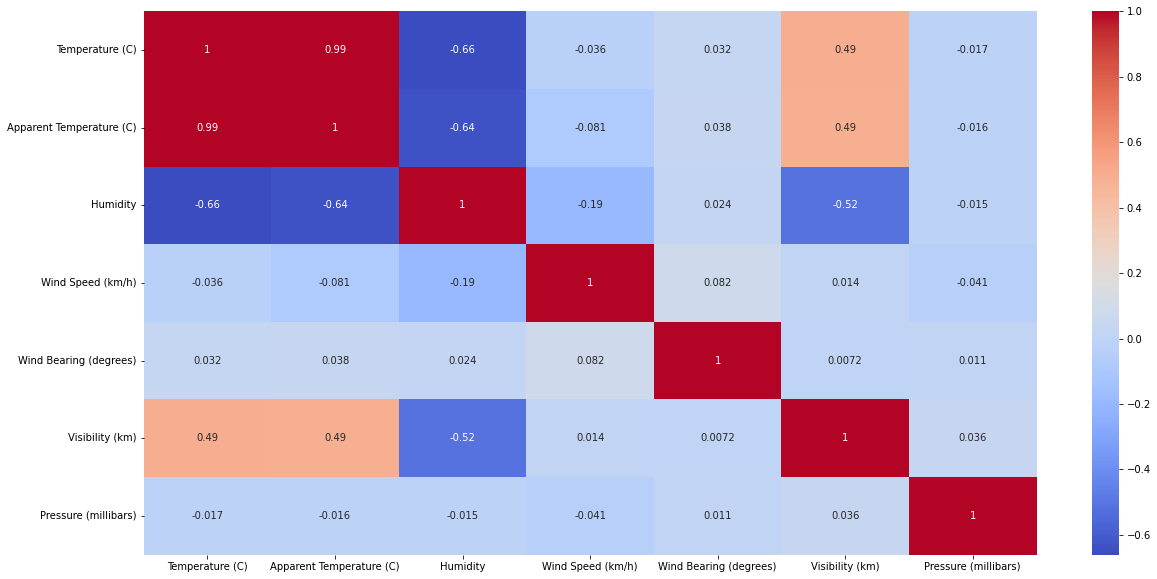

In [83]:
plt.figure(figsize=[20,10])
sns.heatmap(a.corr(),cmap='coolwarm',annot=True)

In [84]:
b = df[df['Year']=='2007']
b.shape

(8760, 11)

In [85]:
b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 8784 to 17543
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      8760 non-null   object 
 1   Summary                   8760 non-null   object 
 2   Precip Type               8760 non-null   object 
 3   Temperature (C)           8760 non-null   float64
 4   Apparent Temperature (C)  8760 non-null   float64
 5   Humidity                  8760 non-null   float64
 6   Wind Speed (km/h)         8760 non-null   float64
 7   Wind Bearing (degrees)    8760 non-null   float64
 8   Visibility (km)           8760 non-null   float64
 9   Pressure (millibars)      8760 non-null   float64
 10  Daily Summary             8760 non-null   object 
dtypes: float64(7), object(4)
memory usage: 821.2+ KB


In [86]:
b.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,12.135239,11.063135,0.689652,10.825392,194.119292,10.408191,1001.640226
std,9.384045,10.283586,0.199648,6.970801,105.558299,3.647454,125.100009
min,-10.155556,-12.422222,0.130000,0.000000,0.000000,0.000000,0.000000
25%,5.033333,2.888889,0.550000,5.747700,123.000000,9.901500,1011.840000
50%,11.138889,11.138889,0.740000,9.788800,198.000000,10.030300,1016.510000
75%,18.800000,18.800000,0.850000,14.200200,290.000000,11.447100,1022.260000
max,39.905556,38.377778,1.000000,63.852600,359.000000,16.100000,1041.650000


In [87]:
temp_range_2007 = b['Temperature (C)'].max() - b['Temperature (C)'].min()
temp_range_2007

50.06111111111111

<AxesSubplot:>

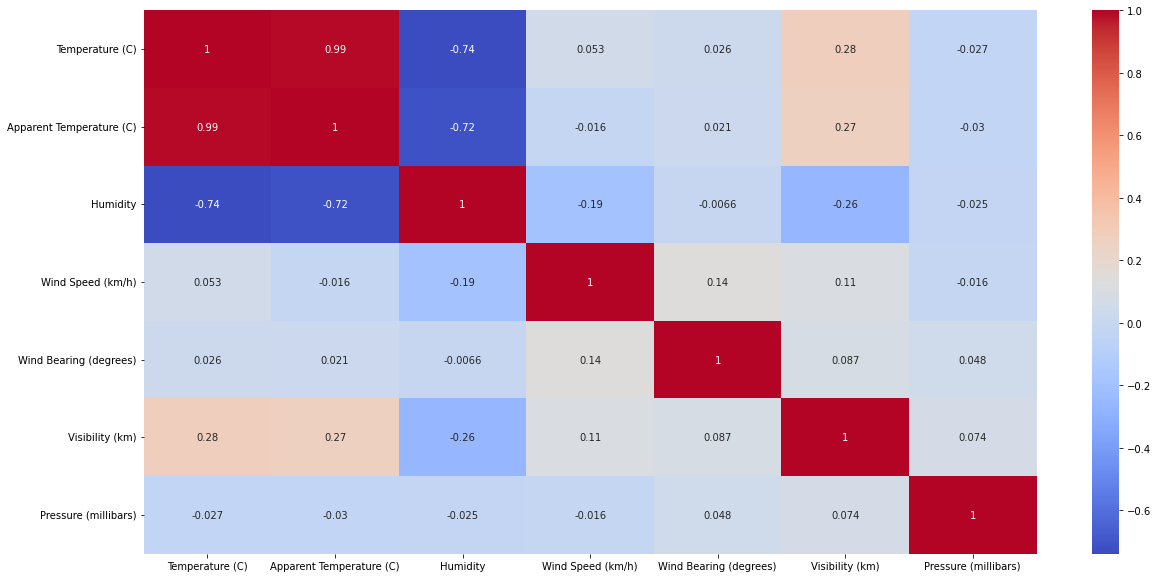

In [88]:
plt.figure(figsize=[20,10])
sns.heatmap(b.corr(),cmap='coolwarm',annot=True)

In [89]:
c = df[df['Year']=='2008']
c.shape

(8784, 11)

In [90]:
c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8784 entries, 17544 to 26327
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      8784 non-null   object 
 1   Summary                   8784 non-null   object 
 2   Precip Type               8784 non-null   object 
 3   Temperature (C)           8784 non-null   float64
 4   Apparent Temperature (C)  8784 non-null   float64
 5   Humidity                  8784 non-null   float64
 6   Wind Speed (km/h)         8784 non-null   float64
 7   Wind Bearing (degrees)    8784 non-null   float64
 8   Visibility (km)           8784 non-null   float64
 9   Pressure (millibars)      8784 non-null   float64
 10  Daily Summary             8784 non-null   object 
dtypes: float64(7), object(4)
memory usage: 823.5+ KB


In [91]:
c.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,12.161876,11.053184,0.701237,11.303897,193.825250,10.267119,1007.734504
std,9.177110,10.245629,0.184550,7.038308,103.773725,3.568314,98.204907
min,-11.127778,-17.261111,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.583333,3.015278,0.570000,6.230700,130.000000,9.901500,1011.580000
50%,11.577778,11.577778,0.740000,10.642100,190.000000,9.982000,1016.550000
75%,18.656944,18.656944,0.850000,14.441700,291.000000,11.342450,1022.252500
max,37.755556,36.855556,1.000000,55.931400,359.000000,16.100000,1046.380000


<AxesSubplot:>

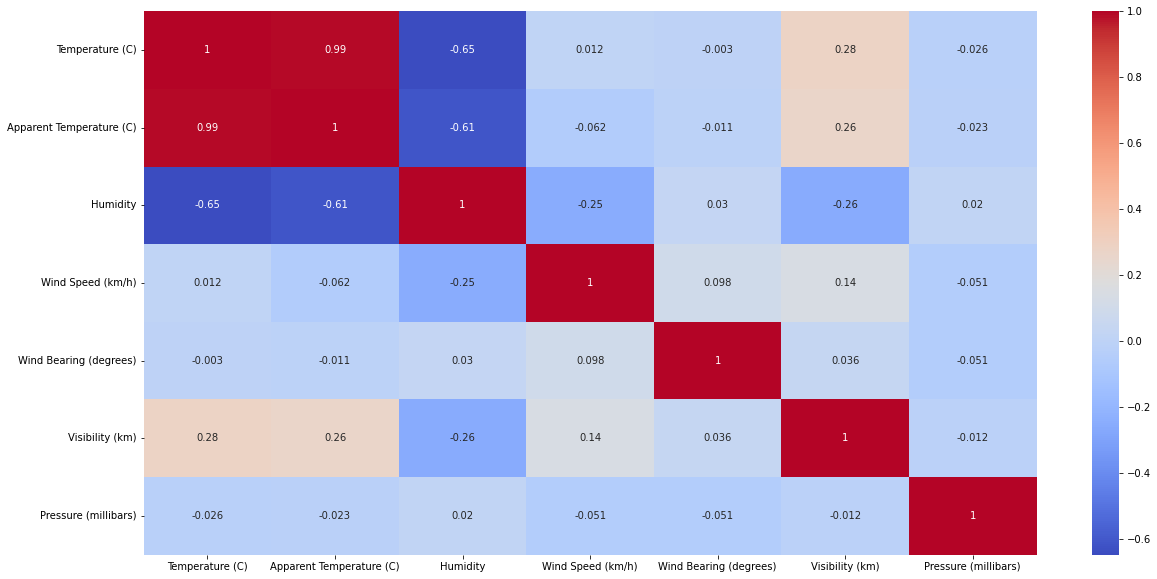

In [92]:
plt.figure(figsize=[20,10])
sns.heatmap(c.corr(),cmap='coolwarm',annot=True)

In [93]:
d = df[df['Year'] == '2009']
d.shape

(8760, 11)

In [94]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 26328 to 35087
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      8760 non-null   object 
 1   Summary                   8760 non-null   object 
 2   Precip Type               8760 non-null   object 
 3   Temperature (C)           8760 non-null   float64
 4   Apparent Temperature (C)  8760 non-null   float64
 5   Humidity                  8760 non-null   float64
 6   Wind Speed (km/h)         8760 non-null   float64
 7   Wind Bearing (degrees)    8760 non-null   float64
 8   Visibility (km)           8760 non-null   float64
 9   Pressure (millibars)      8760 non-null   float64
 10  Daily Summary             8760 non-null   object 
dtypes: float64(7), object(4)
memory usage: 821.2+ KB


In [95]:
d.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,12.267910,11.069337,0.707247,11.505948,180.496461,10.001370,1002.608735
std,9.771362,10.969885,0.204392,7.517410,111.844844,3.938705,114.330599
min,-16.666667,-24.233333,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,2.427778,0.560000,6.440000,90.000000,9.519125,1011.300000
50%,12.508333,12.508333,0.760000,10.996300,170.000000,9.982000,1016.500000
75%,19.894444,19.894444,0.880000,14.490000,290.000000,11.270000,1019.800000
max,36.111111,36.922222,1.000000,48.300000,359.000000,16.100000,1042.040000


<AxesSubplot:>

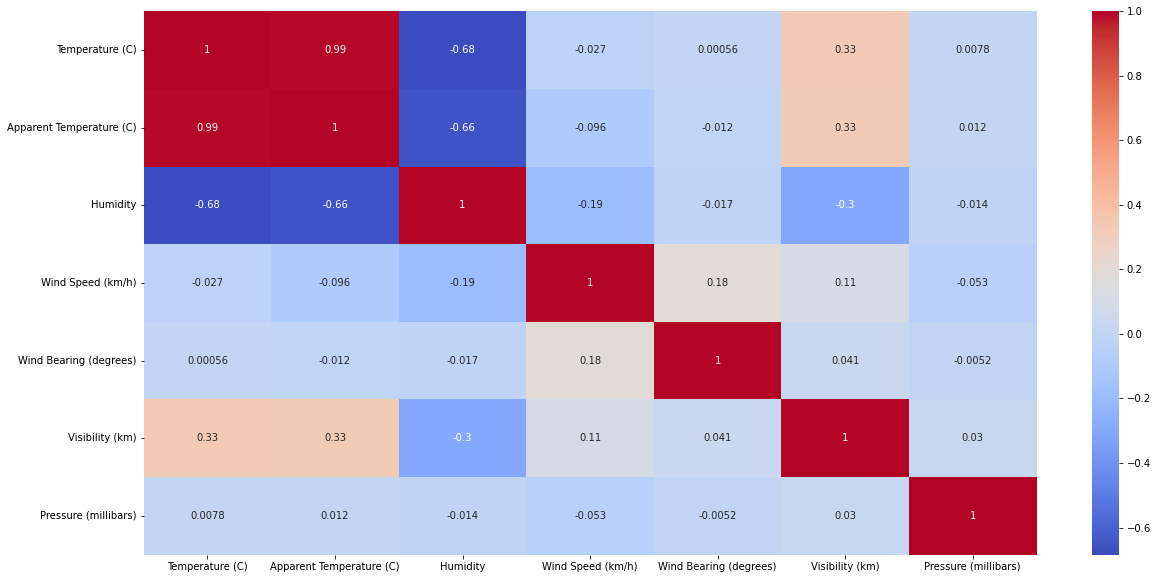

In [96]:
plt.figure(figsize=[20,10])
sns.heatmap(d.corr(),cmap='coolwarm',annot=True)

In [97]:
e = df[df['Year'] == '2010']
e.shape

(8784, 11)

In [98]:
e.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8784 entries, 8040 to 43847
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      8784 non-null   object 
 1   Summary                   8784 non-null   object 
 2   Precip Type               8784 non-null   object 
 3   Temperature (C)           8784 non-null   float64
 4   Apparent Temperature (C)  8784 non-null   float64
 5   Humidity                  8784 non-null   float64
 6   Wind Speed (km/h)         8784 non-null   float64
 7   Wind Bearing (degrees)    8784 non-null   float64
 8   Visibility (km)           8784 non-null   float64
 9   Pressure (millibars)      8784 non-null   float64
 10  Daily Summary             8784 non-null   object 
dtypes: float64(7), object(4)
memory usage: 823.5+ KB


In [99]:
e.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,11.202061,10.098643,0.796858,11.015628,192.067509,9.140810,1004.811891
std,9.649244,11.120552,0.168368,6.856158,108.469171,3.771231,97.234431
min,-15.483333,-21.411111,0.290000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,1.111111,0.690000,6.101900,114.000000,6.343400,1009.820000
50%,11.975000,11.975000,0.850000,10.465000,183.000000,9.982000,1014.210000
75%,17.800000,17.800000,0.930000,14.200200,299.000000,11.270000,1018.662500
max,34.927778,38.116667,1.000000,46.207000,359.000000,16.100000,1037.850000


<AxesSubplot:>

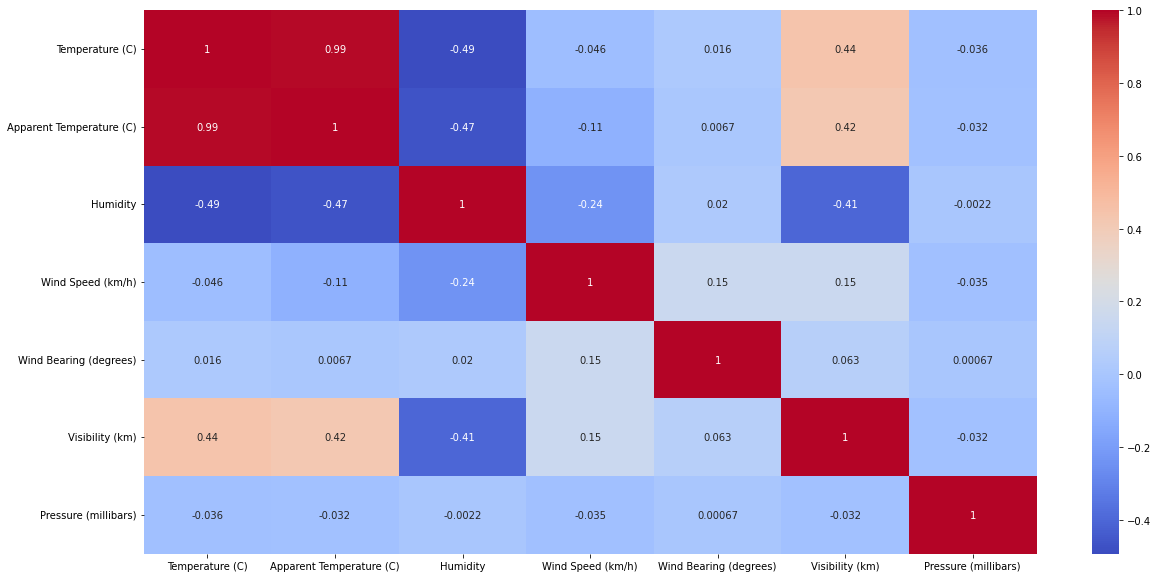

In [100]:
plt.figure(figsize=[20,10])
sns.heatmap(e.corr(),cmap='coolwarm',annot=True)

In [101]:
f = df[df['Year']=='2011']
f.shape

(8760, 11)

In [102]:
f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 43848 to 52607
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      8760 non-null   object 
 1   Summary                   8760 non-null   object 
 2   Precip Type               8760 non-null   object 
 3   Temperature (C)           8760 non-null   float64
 4   Apparent Temperature (C)  8760 non-null   float64
 5   Humidity                  8760 non-null   float64
 6   Wind Speed (km/h)         8760 non-null   float64
 7   Wind Bearing (degrees)    8760 non-null   float64
 8   Visibility (km)           8760 non-null   float64
 9   Pressure (millibars)      8760 non-null   float64
 10  Daily Summary             8760 non-null   object 
dtypes: float64(7), object(4)
memory usage: 821.2+ KB


In [103]:
f.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,11.524453,10.584294,0.736017,9.898262,189.342352,9.507929,1014.184075
std,10.139322,11.083158,0.202686,6.655776,109.739120,4.062030,69.925923
min,-11.700000,-12.761111,0.200000,0.000000,0.000000,0.000000,0.000000
25%,2.665278,0.783333,0.590000,4.701200,114.000000,7.212800,1013.860000
50%,11.688889,11.688889,0.790000,9.112600,181.000000,9.982000,1018.200000
75%,18.945833,18.945833,0.910000,13.572300,297.000000,11.270000,1023.650000
max,37.800000,37.716667,1.000000,49.394800,359.000000,16.100000,1041.140000


<AxesSubplot:>

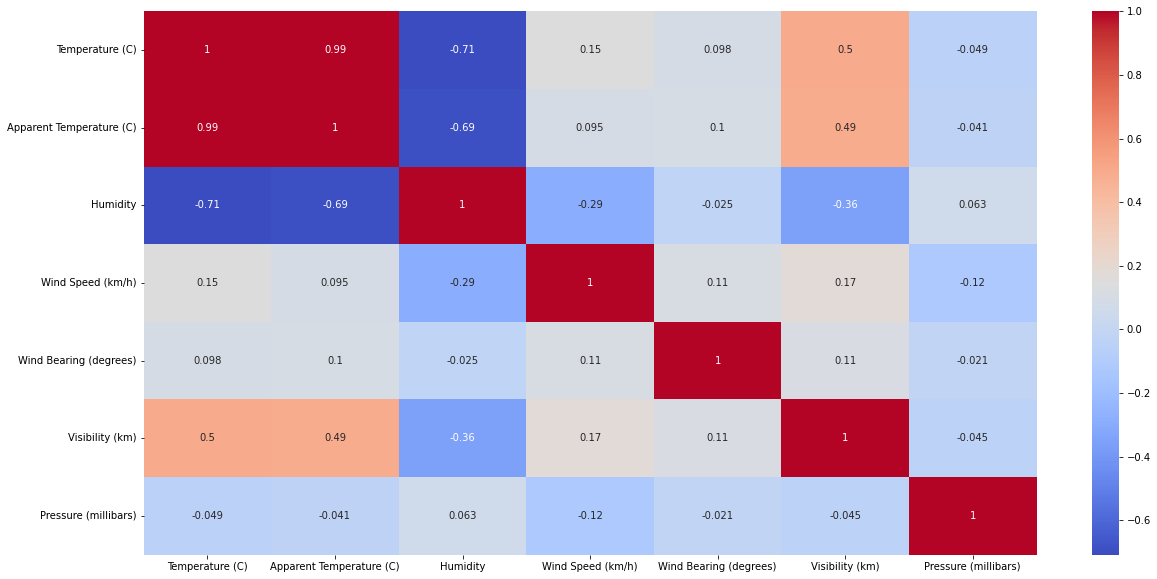

In [104]:
plt.figure(figsize=[20,10])
sns.heatmap(f.corr(),cmap='coolwarm',annot=True)

In [105]:
g = df[df['Year'] == '2012']
g.shape

(8641, 11)

In [106]:
g.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8641 entries, 52608 to 61391
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      8641 non-null   object 
 1   Summary                   8641 non-null   object 
 2   Precip Type               8641 non-null   object 
 3   Temperature (C)           8641 non-null   float64
 4   Apparent Temperature (C)  8641 non-null   float64
 5   Humidity                  8641 non-null   float64
 6   Wind Speed (km/h)         8641 non-null   float64
 7   Wind Bearing (degrees)    8641 non-null   float64
 8   Visibility (km)           8641 non-null   float64
 9   Pressure (millibars)      8641 non-null   float64
 10  Daily Summary             8641 non-null   object 
dtypes: float64(7), object(4)
memory usage: 810.1+ KB


In [107]:
g.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,8641.000000,8641.000000,8641.000000,8641.000000,8641.000000,8641.000000,8641.000000
mean,11.949810,10.699988,0.689771,11.243114,187.561509,10.342349,999.203832
std,11.092555,12.362593,0.218413,7.189634,109.276409,3.827581,133.029188
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.333333,1.111111,0.530000,6.101900,116.000000,9.982000,1011.870000
50%,12.222222,12.222222,0.730000,10.529400,180.000000,9.982000,1016.160000
75%,20.027778,20.027778,0.870000,14.490000,290.000000,11.447100,1021.460000
max,38.861111,37.883333,1.000000,45.080000,359.000000,16.100000,1037.100000


<AxesSubplot:>

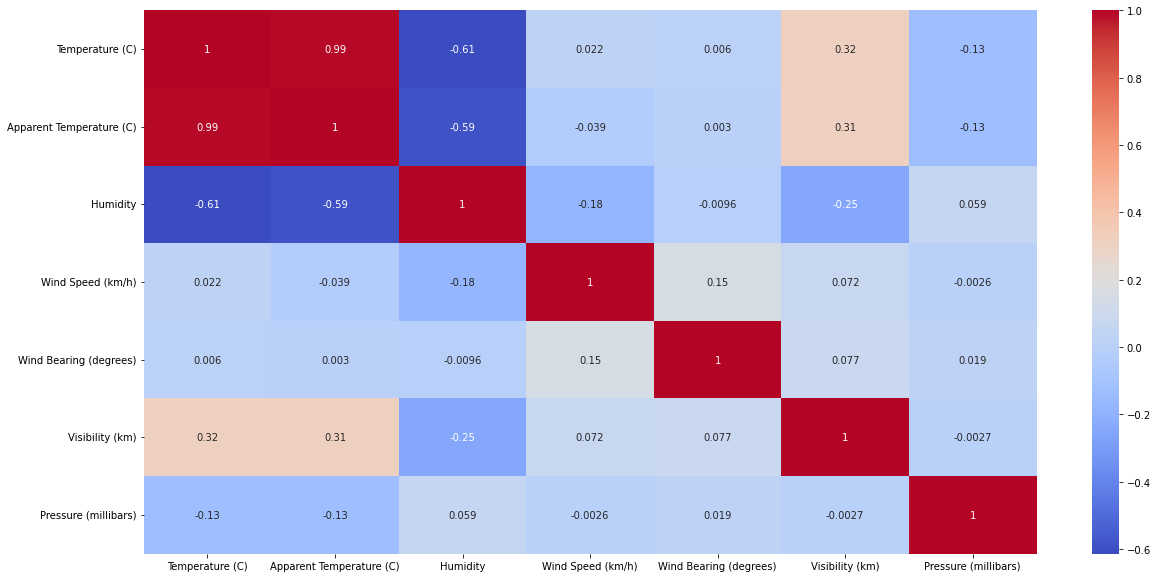

In [108]:
plt.figure(figsize=[20,10])
sns.heatmap(g.corr(),cmap='coolwarm',annot=True)

In [109]:
h = df[df['Year'] == '2013']
h.shape

(8760, 11)

In [110]:
h.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 61392 to 70151
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      8760 non-null   object 
 1   Summary                   8760 non-null   object 
 2   Precip Type               8760 non-null   object 
 3   Temperature (C)           8760 non-null   float64
 4   Apparent Temperature (C)  8760 non-null   float64
 5   Humidity                  8760 non-null   float64
 6   Wind Speed (km/h)         8760 non-null   float64
 7   Wind Bearing (degrees)    8760 non-null   float64
 8   Visibility (km)           8760 non-null   float64
 9   Pressure (millibars)      8760 non-null   float64
 10  Daily Summary             8760 non-null   object 
dtypes: float64(7), object(4)
memory usage: 821.2+ KB


In [111]:
h.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,11.940719,10.825320,0.754209,10.969389,187.861758,10.892049,1004.950764
std,9.389894,10.565661,0.194935,7.044222,107.407628,4.314109,104.974560
min,-8.983333,-13.888889,0.150000,0.000000,0.000000,0.000000,0.000000
25%,3.943056,1.515278,0.630000,5.872475,111.000000,9.676100,1011.020000
50%,11.941667,11.941667,0.800000,10.207400,183.000000,10.899700,1015.880000
75%,18.750000,18.750000,0.920000,14.216300,290.000000,15.182300,1020.290000
max,37.872222,39.344444,1.000000,50.135400,359.000000,16.100000,1041.930000


<AxesSubplot:>

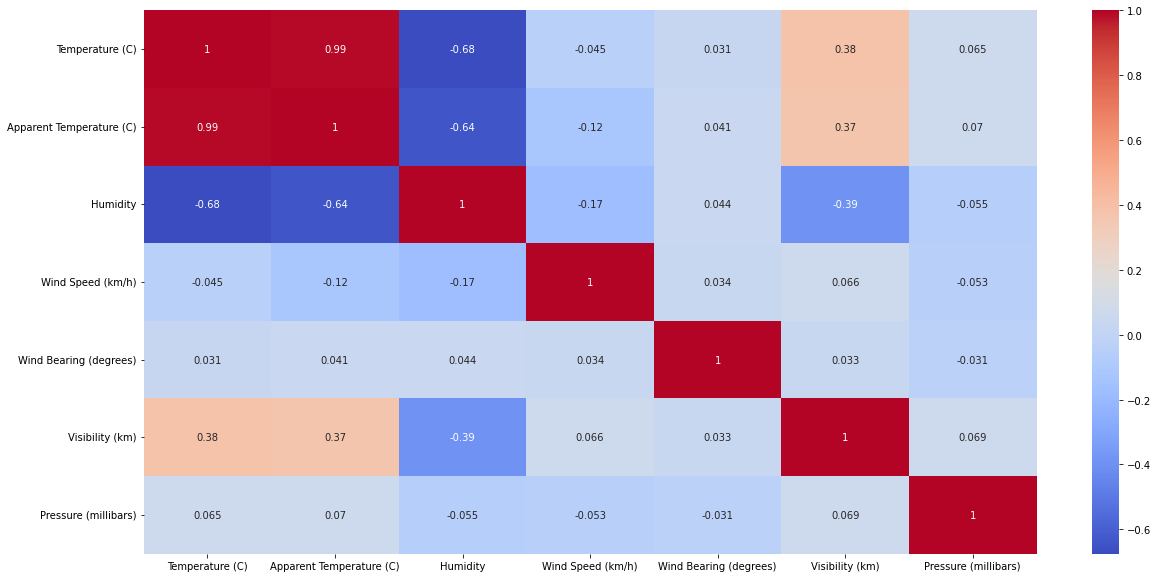

In [112]:
plt.figure(figsize=[20,10])
sns.heatmap(h.corr(),cmap='coolwarm',annot=True)

In [113]:
i = df[df['Year'] == '2014']
i.shape

(8757, 11)

In [114]:
i.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8757 entries, 70152 to 78908
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      8757 non-null   object 
 1   Summary                   8757 non-null   object 
 2   Precip Type               8757 non-null   object 
 3   Temperature (C)           8757 non-null   float64
 4   Apparent Temperature (C)  8757 non-null   float64
 5   Humidity                  8757 non-null   float64
 6   Wind Speed (km/h)         8757 non-null   float64
 7   Wind Bearing (degrees)    8757 non-null   float64
 8   Visibility (km)           8757 non-null   float64
 9   Pressure (millibars)      8757 non-null   float64
 10  Daily Summary             8757 non-null   object 
dtypes: float64(7), object(4)
memory usage: 821.0+ KB


In [115]:
i.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,8757.000000,8757.000000,8757.000000,8757.000000,8757.000000,8757.000000,8757.000000
mean,12.529737,11.628703,0.748578,10.502473,178.226219,11.320806,987.394676
std,8.181327,9.267807,0.183553,6.679484,104.511680,4.586403,167.281651
min,-13.255556,-19.472222,0.180000,0.000000,0.000000,0.000000,0.000000
25%,6.600000,4.866667,0.640000,5.457900,110.000000,9.096500,1011.190000
50%,12.355556,12.355556,0.800000,9.853200,160.000000,10.352300,1014.990000
75%,18.344444,18.344444,0.900000,13.846000,280.000000,15.697500,1019.470000
max,33.911111,35.094444,1.000000,54.884900,359.000000,16.100000,1039.130000


<AxesSubplot:>

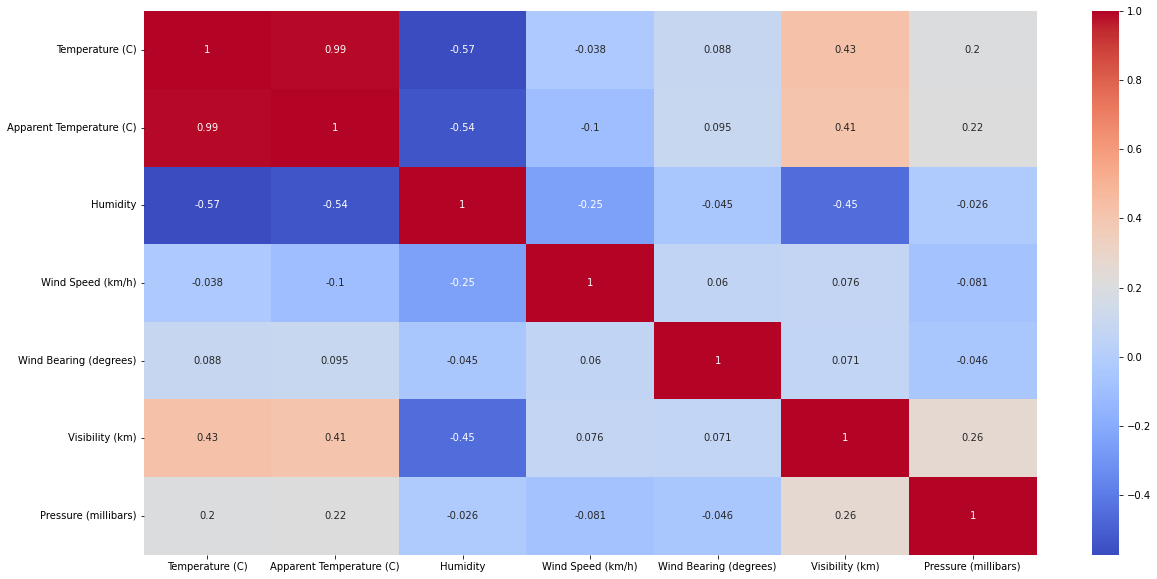

In [116]:
plt.figure(figsize=[20,10])
sns.heatmap(i.corr(),cmap='coolwarm',annot=True)

In [117]:
j = df[df['Year']=='2015']
j.shape

(8760, 11)

In [118]:
j.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 78909 to 87668
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      8760 non-null   object 
 1   Summary                   8760 non-null   object 
 2   Precip Type               8760 non-null   object 
 3   Temperature (C)           8760 non-null   float64
 4   Apparent Temperature (C)  8760 non-null   float64
 5   Humidity                  8760 non-null   float64
 6   Wind Speed (km/h)         8760 non-null   float64
 7   Wind Bearing (degrees)    8760 non-null   float64
 8   Visibility (km)           8760 non-null   float64
 9   Pressure (millibars)      8760 non-null   float64
 10  Daily Summary             8760 non-null   object 
dtypes: float64(7), object(4)
memory usage: 821.2+ KB


In [119]:
j.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,12.311370,11.340911,0.732355,10.735247,184.098174,10.912786,1005.179401
std,9.367783,10.401825,0.200232,7.070953,112.159916,5.092462,116.754195
min,-13.066667,-14.644444,0.180000,0.000000,0.000000,0.000000,0.000000
25%,4.433333,2.627778,0.590000,5.357275,95.000000,7.486500,1013.290000
50%,12.055556,12.055556,0.780000,9.788800,180.000000,10.352300,1017.520000
75%,18.911111,18.911111,0.900000,14.055300,292.000000,15.826300,1023.442500
max,37.194444,37.783333,1.000000,46.609500,359.000000,16.100000,1042.380000


<AxesSubplot:>

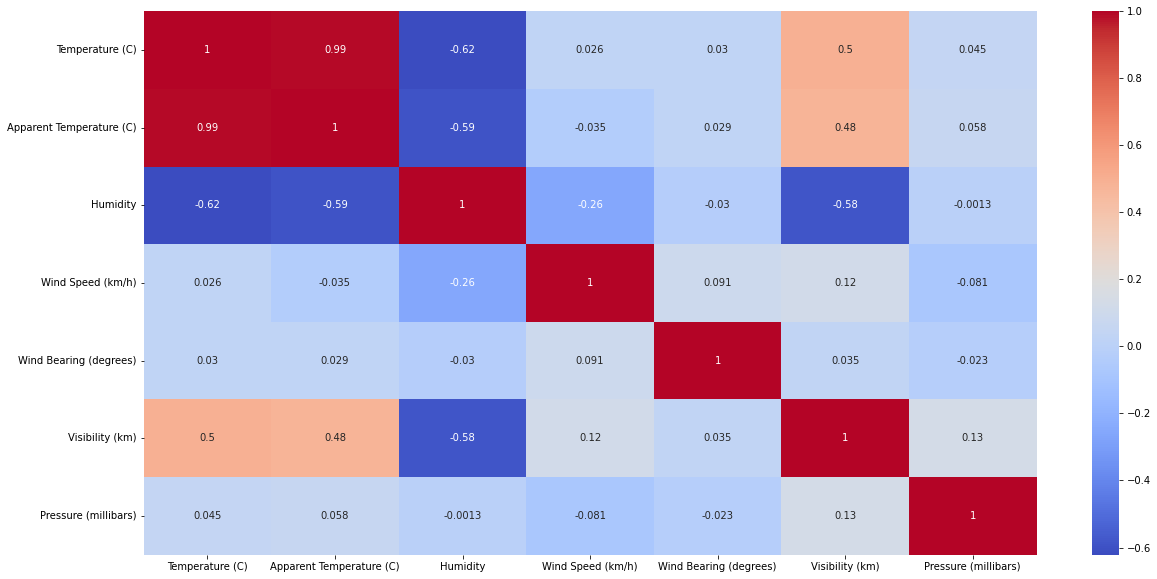

In [120]:
plt.figure(figsize=[20,10])
sns.heatmap(j.corr(),cmap='coolwarm',annot=True)

In [121]:
k = df[df['Year'] == '2016']
k.shape

(8410, 11)

In [122]:
k.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8410 entries, 87669 to 96452
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      8410 non-null   object 
 1   Summary                   8410 non-null   object 
 2   Precip Type               8410 non-null   object 
 3   Temperature (C)           8410 non-null   float64
 4   Apparent Temperature (C)  8410 non-null   float64
 5   Humidity                  8410 non-null   float64
 6   Wind Speed (km/h)         8410 non-null   float64
 7   Wind Bearing (degrees)    8410 non-null   float64
 8   Visibility (km)           8410 non-null   float64
 9   Pressure (millibars)      8410 non-null   float64
 10  Daily Summary             8410 non-null   object 
dtypes: float64(7), object(4)
memory usage: 788.4+ KB


In [123]:
k.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,8410.000000,8410.000000,8410.000000,8410.000000,8410.000000,8410.000000,8410.000000
mean,12.121132,10.970034,0.760317,10.663338,185.658502,11.483389,1014.787639
std,9.174338,10.393429,0.184948,6.186808,101.237612,4.309768,35.627229
min,-10.133333,-17.222222,0.230000,0.000000,0.000000,0.000000,0.000000
25%,4.588889,2.100000,0.650000,6.295100,132.000000,8.645700,1012.660000
50%,11.283333,11.283333,0.810000,9.998100,176.000000,10.352300,1016.750000
75%,18.933333,18.933333,0.910000,13.862100,274.000000,15.729700,1019.750000
max,34.811111,37.005556,1.000000,38.833200,359.000000,16.100000,1038.010000


In [124]:
temp_range_2016 = k['Temperature (C)'].max() - k['Temperature (C)'].min()
temp_range_2016

44.94444444444444

<AxesSubplot:>

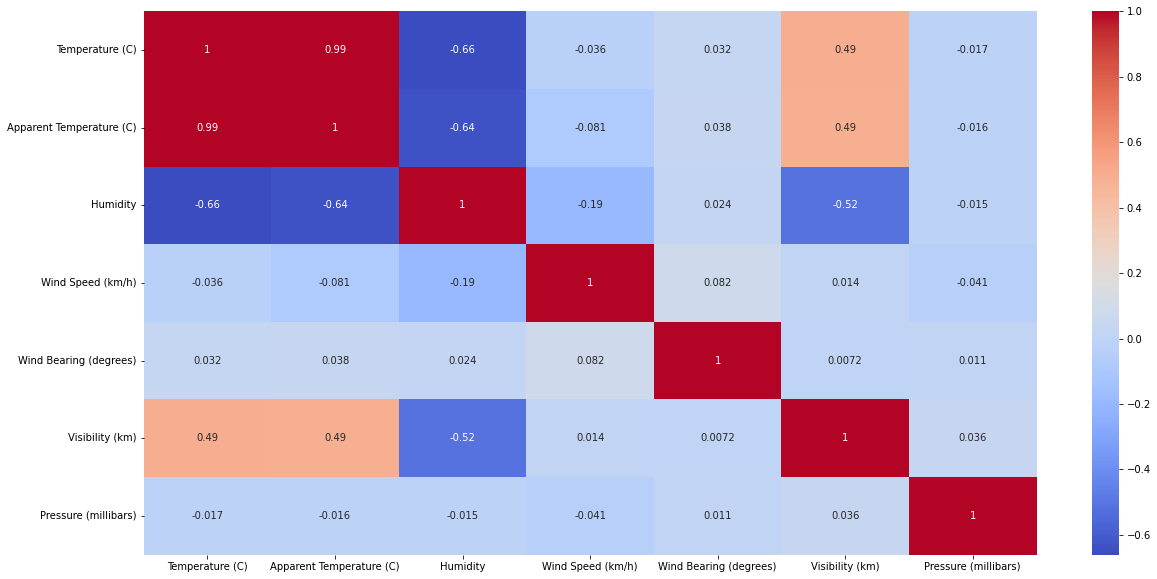

In [125]:
plt.figure(figsize=[20,10])
sns.heatmap(k.corr(),cmap='coolwarm',annot=True)

In [126]:
x = [a,b,c,d,e,f,g,h,i,j,k]
max_temp = []
min_temp = []
avg_temp = []
for i in x:
    #print(i['Temperature (C)'].max())
    max_temp.append(i['Temperature (C)'].max())
    min_temp.append(i['Temperature (C)'].min())
    avg_temp.append(i['Temperature (C)'].mean())

<AxesSubplot:xlabel='Year'>

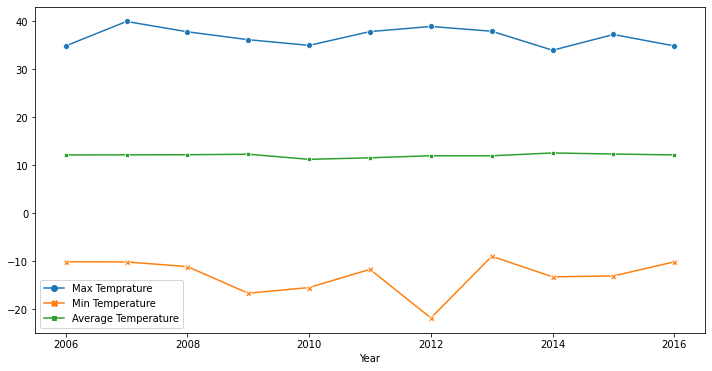

In [127]:
year_list=[2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]
plt.figure(figsize=(12,6))
sns.lineplot(data=pd.DataFrame({'Year':year_list,'Max Temprature':max_temp,'Min Temperature':min_temp,
                                'Average Temperature':avg_temp}).set_index('Year'),markers=True, dashes=False)